##### 2) Salary_hike -- Build a prediction model for Salary_hike

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing required libraries for reading dataset
import pandas as pd
import numpy as np

In [3]:
#Reading csv file using pandas
df = pd.read_csv("Salary_Data.csv")
df.columns

Index(['YearsExperience', 'Salary'], dtype='object')

In [4]:
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


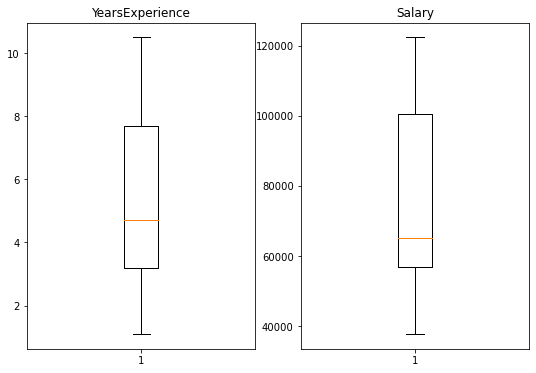

In [6]:
# Plotting data to check for outliers

import matplotlib.pyplot as plt

plt.subplots(figsize = (9, 6))
plt.subplot(121)
plt.boxplot(df['YearsExperience'])
plt.title('YearsExperience')
plt.subplot(122)
plt.boxplot(df['Salary'])
plt.title('Salary')
plt.show()

In [7]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

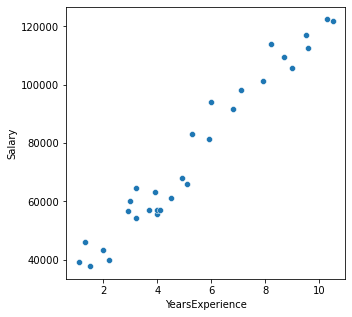

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (5, 5))
sns.scatterplot(x = 'YearsExperience', y = 'Salary', data = df, palette = 'Set1')

# Correlation 

In [9]:
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

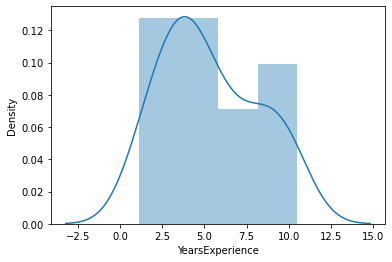

In [10]:
import seaborn as sns
sns.distplot(df['YearsExperience'])

<AxesSubplot:xlabel='Salary', ylabel='Density'>

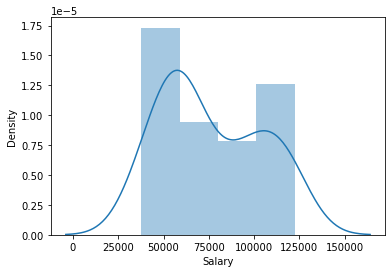

In [11]:
import seaborn as sns
sns.distplot(df['Salary'])

Fitting a Linear Regression Model

In [12]:
import statsmodels.formula.api as smf

In [13]:
#OLS=Ordinary Least Squares
model = smf.ols('Salary~YearsExperience', data = df).fit()

<AxesSubplot:xlabel='Salary', ylabel='YearsExperience'>

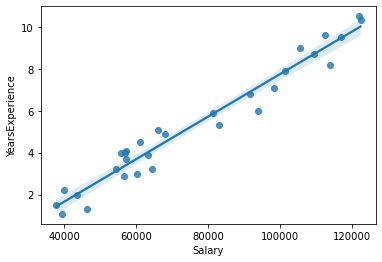

In [14]:
#To see the best fit line (which ia as close as possible to as many points as possible)
sns.regplot(x = 'Salary', y = 'YearsExperience', data = df)

In [15]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Fri, 18 Nov 2022   Prob (F-statistic):           1.14e-20
Time:                        17:22:27   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
#Coefficients
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

##### Interpretation for Beta Coefficient of Salary
##### For every unit increase in the YearsExperience, the Salary will increase 9449.962321

In [17]:
#LOG, SQRT and CBRT Transformations and appending them to the table 

#LOG

df['YearsExperience_Log'] = np.log(df['YearsExperience'])
df['Salary_Log'] = np.log(df['Salary'])

#SQRT

df['YearsExperience_SQRT'] = np.sqrt(df['YearsExperience'])
df['Salary_SQRT'] = np.sqrt(df['Salary'])

#CBRT

df['YearsExperience_CBRT'] = np.cbrt(df['YearsExperience'])
df['Salary_CBRT'] = np.cbrt(df['Salary'])

df

,YearsExperience,Salary,YearsExperience_Log,Salary_Log,YearsExperience_SQRT,Salary_SQRT,YearsExperience_CBRT,Salary_CBRT
0,1.1,39343.0,0.095310,10.580073,1.048809,198.350700,1.032280,34.011242
1,1.3,46205.0,0.262364,10.740843,1.140175,214.953483,1.091393,35.883626
2,1.5,37731.0,0.405465,10.538237,1.224745,194.244691,1.144714,33.540235
3,2.0,43525.0,0.693147,10.681091,1.414214,208.626460,1.259921,35.175984
4,2.2,39891.0,0.788457,10.593906,1.483240,199.727314,1.300591,34.168426
5,2.9,56642.0,1.064711,10.944506,1.702939,237.995798,1.426043,38.404271
6,3.0,60150.0,1.098612,11.004597,1.732051,245.254969,1.442250,39.181273
7,3.2,54445.0,1.163151,10.904946,1.788854,233.334524,1.473613,37.901174
8,3.2,64445.0,1.163151,11.073567,1.788854,253.860198,1.473613,40.092494
9,3.7,57189.0,1.308333,10.954117,1.923538,239.142217,1.546680,38.527500


<AxesSubplot:xlabel='Salary_Log', ylabel='YearsExperience_Log'>

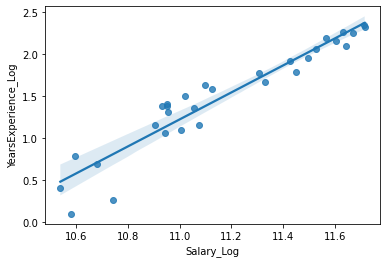

In [18]:
model_log = smf.ols('Salary_Log~YearsExperience_Log', data = df).fit()
sns.regplot(x = 'Salary_Log', y = 'YearsExperience_Log', data = df)

In [19]:
model_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Salary_Log   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     267.4
Date:                Fri, 18 Nov 2022   Prob (F-statistic):           7.40e-16
Time:                        17:22:28   Log-Likelihood:                 23.209
No. Observations:                  30   AIC:                            -42.42
Df Residuals:                      28   BIC:                            -39.61
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              10.3280      0.056    184.868      0.000      10.214      10.442
YearsExperience_Log     0.5621      0.034     16.353      0.000       0.492       0.632
==============================================================================
Omnibus:                        0.102   Durbin-Watson:                   0.988
Prob(Omnibus):                  0.950   Jarque-Bera (JB):                0.297
Skew:                           0.093   Prob(JB):                        0.862
Kurtosis:                       2.549   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:xlabel='Salary_SQRT', ylabel='YearsExperience_SQRT'>

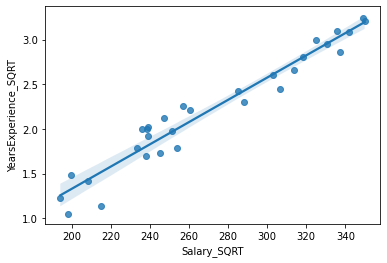

In [20]:
model_sqrt = smf.ols('Salary_SQRT~YearsExperience_SQRT', data = df).fit()
sns.regplot(x = 'Salary_SQRT', y = 'YearsExperience_SQRT', data = df)

In [21]:
model_sqrt.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Salary_SQRT   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     454.3
Date:                Fri, 18 Nov 2022   Prob (F-statistic):           7.58e-19
Time:                        17:22:28   Log-Likelihood:                -116.52
No. Observations:                  30   AIC:                             237.0
Df Residuals:                      28   BIC:                             239.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept              103.5680      8.178     12.663      0.000      86.815     120.321
YearsExperience_SQRT    75.6269      3.548     21.315      0.000      68.359      82.895
==============================================================================
Omnibus:                        0.924   Durbin-Watson:                   1.362
Prob(Omnibus):                  0.630   Jarque-Bera (JB):                0.801
Skew:                           0.087   Prob(JB):                        0.670
Kurtosis:                       2.219   Cond. No.                         9.97
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:xlabel='Salary_CBRT', ylabel='YearsExperience_CBRT'>

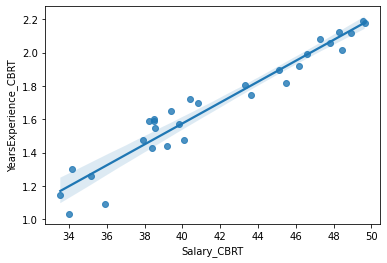

In [22]:
model_cbrt = smf.ols('Salary_CBRT~YearsExperience_CBRT', data = df).fit()
sns.regplot(x = 'Salary_CBRT', y = 'YearsExperience_CBRT', data = df)

In [23]:
model_cbrt.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Salary_CBRT   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     386.5
Date:                Fri, 18 Nov 2022   Prob (F-statistic):           6.37e-18
Time:                        17:22:28   Log-Likelihood:                -50.589
No. Observations:                  30   AIC:                             105.2
Df Residuals:                      28   BIC:                             108.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               16.6603      1.300     12.811      0.000      13.996      19.324
YearsExperience_CBRT    14.8963      0.758     19.659      0.000      13.344      16.448
==============================================================================
Omnibus:                        0.386   Durbin-Watson:                   1.229
Prob(Omnibus):                  0.824   Jarque-Bera (JB):                0.535
Skew:                           0.070   Prob(JB):                        0.765
Kurtosis:                       2.361   Cond. No.                         12.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
#To generate the fitted values

df['Predicted'] = model.fittedvalues

#To generate the residual values
#Difference between Actual & fitted values

df['Error'] = model.resid

df['Error_Sq'] = (df['Error'])**2
df

,YearsExperience,Salary,YearsExperience_Log,Salary_Log,YearsExperience_SQRT,Salary_SQRT,YearsExperience_CBRT,Salary_CBRT,Predicted,Error,Error_Sq
0,1.1,39343.0,0.095310,10.580073,1.048809,198.350700,1.032280,34.011242,36187.158752,3155.841248,9.959334e+06
1,1.3,46205.0,0.262364,10.740843,1.140175,214.953483,1.091393,35.883626,38077.151217,8127.848783,6.606193e+07
2,1.5,37731.0,0.405465,10.538237,1.224745,194.244691,1.144714,33.540235,39967.143681,-2236.143681,5.000339e+06
3,2.0,43525.0,0.693147,10.681091,1.414214,208.626460,1.259921,35.175984,44692.124842,-1167.124842,1.362180e+06
4,2.2,39891.0,0.788457,10.593906,1.483240,199.727314,1.300591,34.168426,46582.117306,-6691.117306,4.477105e+07
5,2.9,56642.0,1.064711,10.944506,1.702939,237.995798,1.426043,38.404271,53197.090931,3444.909069,1.186740e+07
6,3.0,60150.0,1.098612,11.004597,1.732051,245.254969,1.442250,39.181273,54142.087163,6007.912837,3.609502e+07
7,3.2,54445.0,1.163151,10.904946,1.788854,233.334524,1.473613,37.901174,56032.079627,-1587.079627,2.518822e+06
8,3.2,64445.0,1.163151,11.073567,1.788854,253.860198,1.473613,40.092494,56032.079627,8412.920373,7.077723e+07
9,3.7,57189.0,1.308333,10.954117,1.923538,239.142217,1.546680,38.527500,60757.060788,-3568.060788,1.273106e+07


In [25]:
model.pvalues

Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64

In [26]:
Mean_Squared_Error = df['Error_Sq'].mean()
Mean_Squared_Error

31270951.722280964

#### Interpretation
##### Considering the model with highest r-squared value we have calculated predicted values, error compared to original data and will be using it to predict new values.
Here the original model is having highest r-squared value, so we will be using that to predict new values.  

95.69% of variation in the dependent variable is explained by the given independent variable

#### Predict for new data point

In [27]:
#Predict for 11, 12 and 15 YearsExperience
newdata = pd.Series([11, 12, 15])
newdata

0    11
1    12
2    15
dtype: int64

In [28]:
newdf = pd.DataFrame(newdata, columns = ['YearsExperience'])
newdf

,YearsExperience
0,11
1,12
2,15


In [29]:
model.predict(newdf)

0    129741.785735
1    139191.748056
2    167541.635020
dtype: float64